In [34]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
import seaborn as sns
import matplotlib.pyplot as plt



# Loading data

In [61]:
raw_train_features = pd.read_csv('train_values.csv')
raw_train_labels = pd.read_csv('train_labels.csv')
raw_test_features = pd.read_csv('test_values.csv')


### EDA

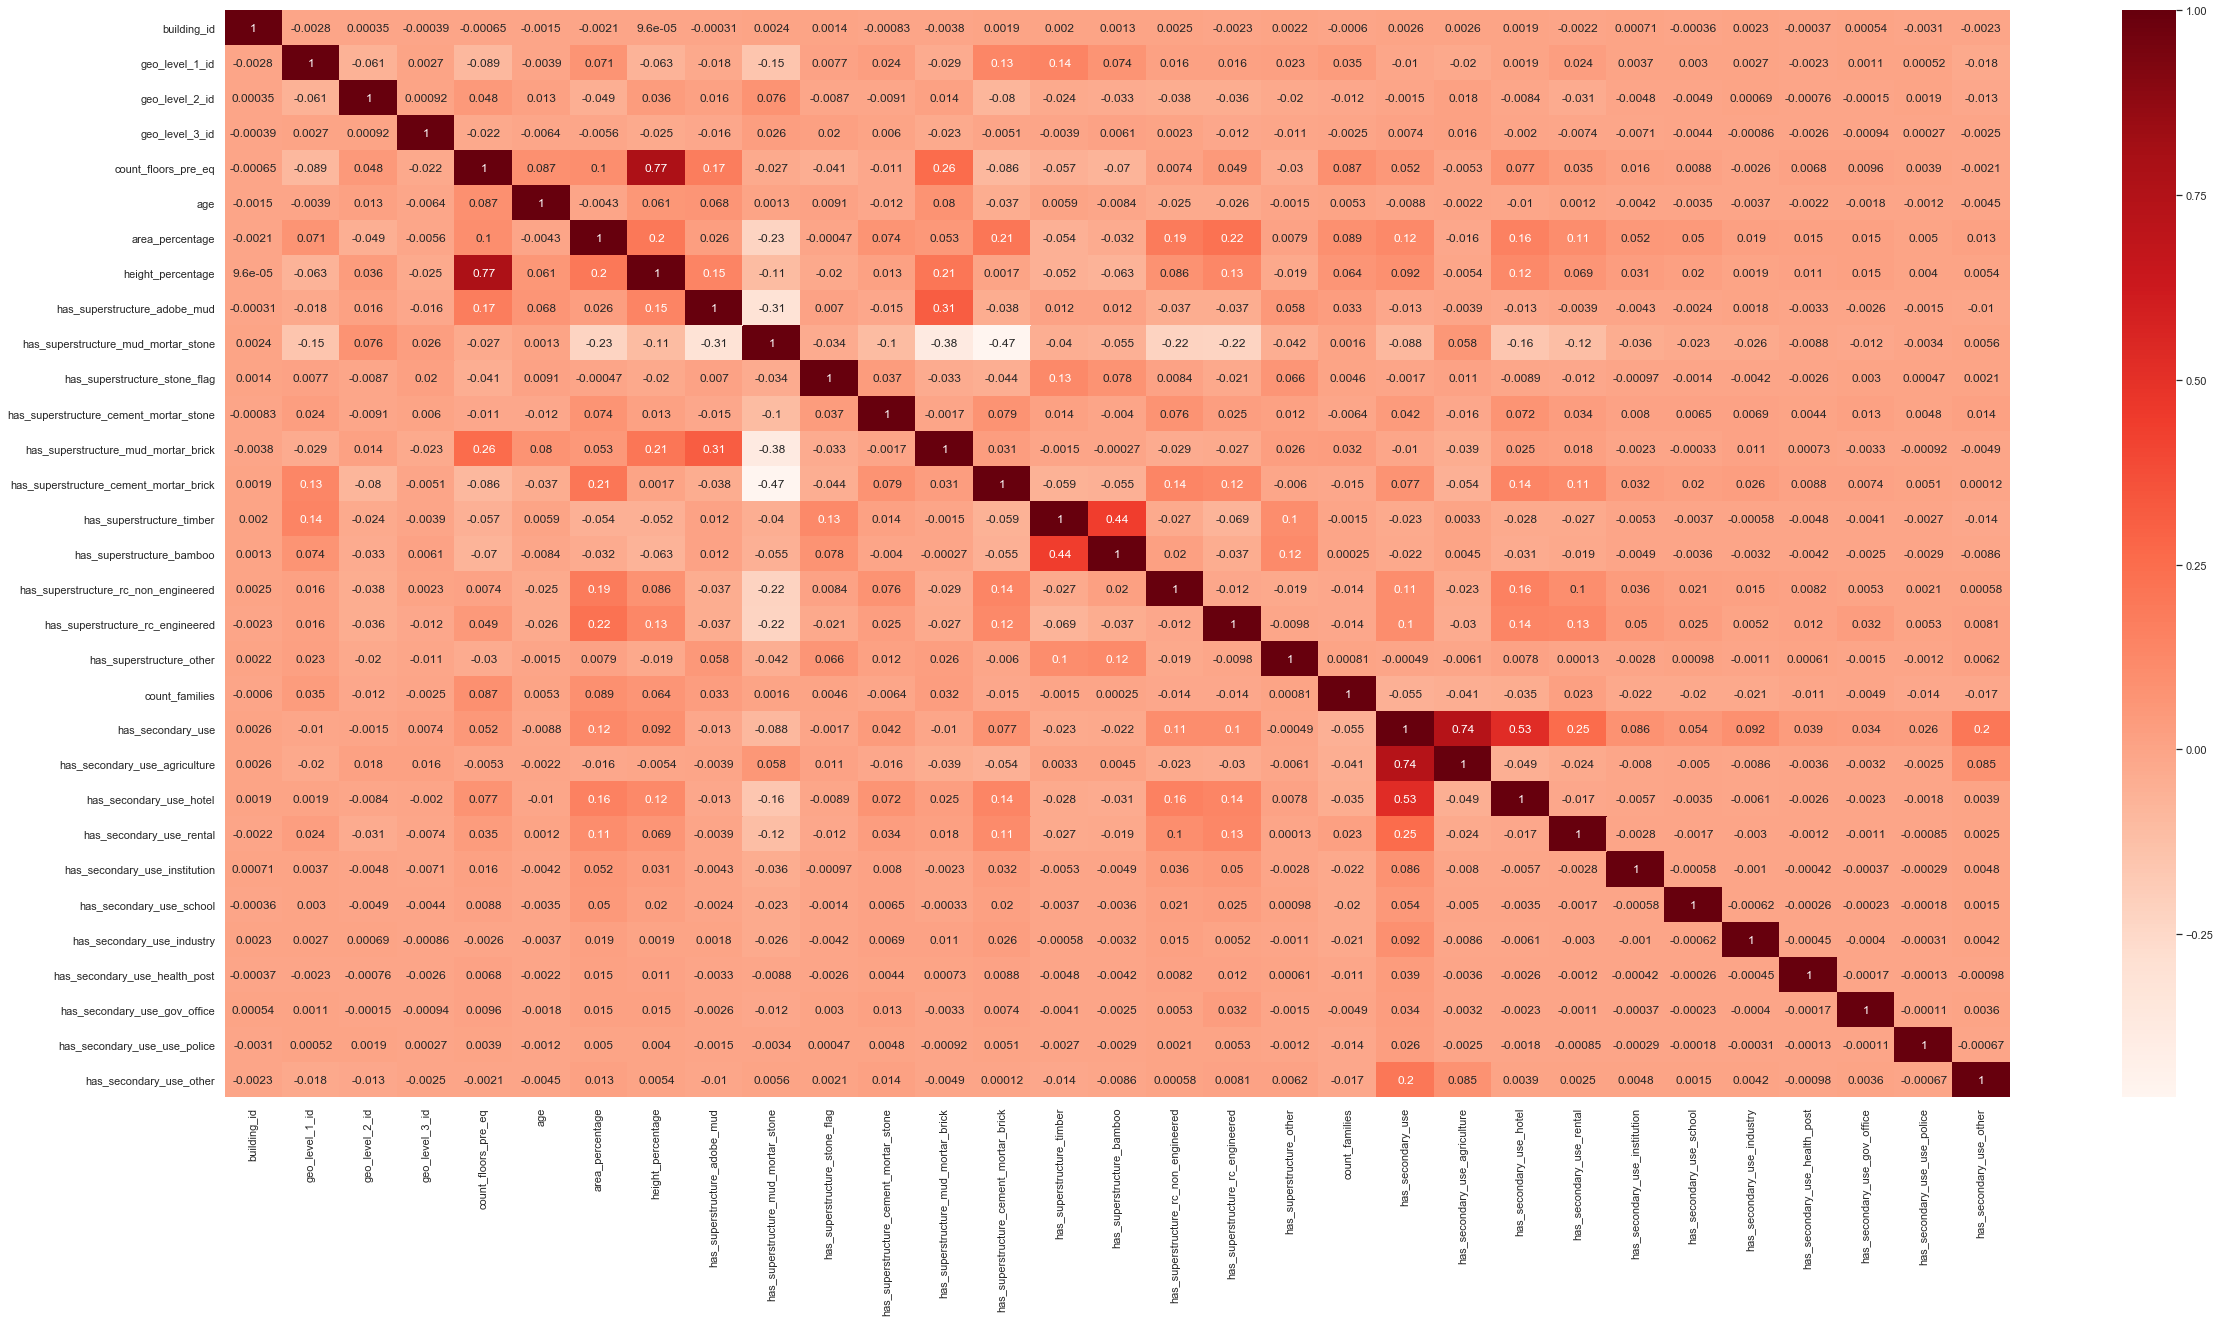

In [521]:
plt.figure(figsize=(40,20))
cor = raw_train_features.corr()
sns.heatmap(cor, annot=True, cmap=plt.cm.Reds)
plt.show()

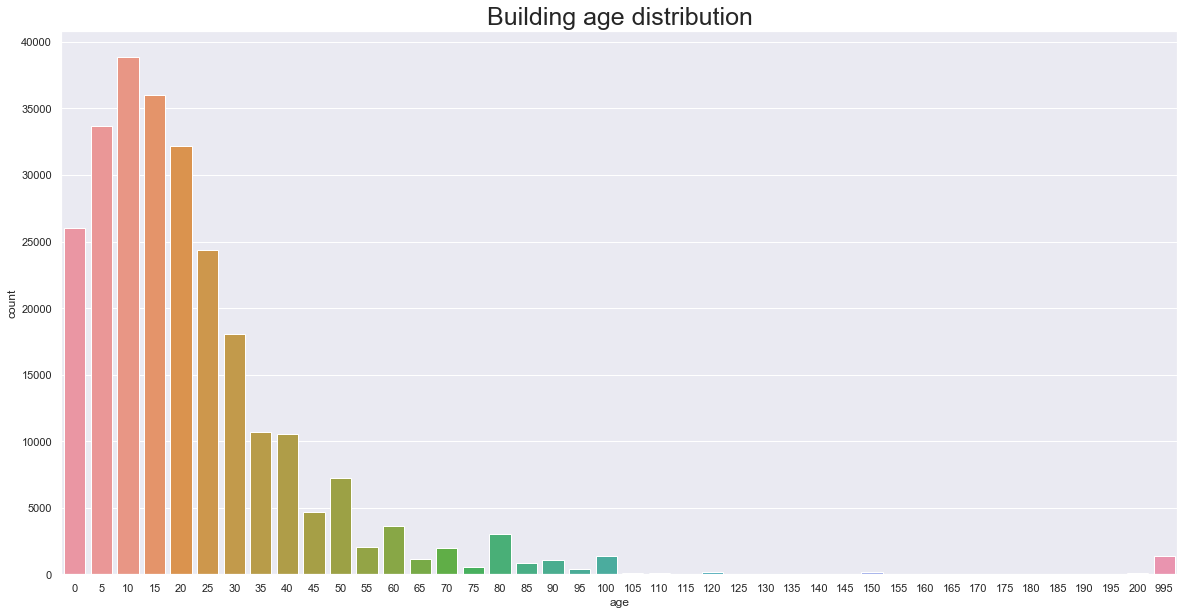

In [483]:
sns.set(style="darkgrid")
plt.figure(figsize=(20,10))
ax = sns.countplot(raw_train_features.age)
plt.title('Building age distribution', fontsize=25)
plt.show()

In [369]:
num_buildings = len(raw_train_features[raw_train_features.age > 100])
print('Number of buildings with more than 100 years:', num_rows, ', which represent ', weight_buildings, ' of the samples')
weight_buildings = len(raw_train_features[raw_train_features.age > 100]*100)/len(raw_train_features)

Number of buildings with more than 100 years: 2124 , which represent  0.008150390827356763  of the samples


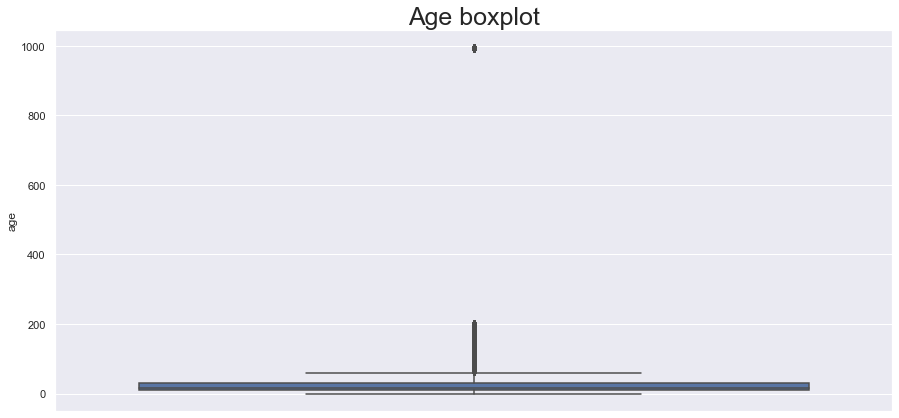

In [370]:
sns.set(style="darkgrid")
plt.figure(figsize=(15,7))
ax = sns.boxplot(y=raw_train_features.age)
plt.title('Age boxplot', fontsize=25)
plt.show()

In [371]:
raw_train_features.age.describe()

count    260601.000000
mean         26.535029
std          73.565937
min           0.000000
25%          10.000000
50%          15.000000
75%          30.000000
max         995.000000
Name: age, dtype: float64

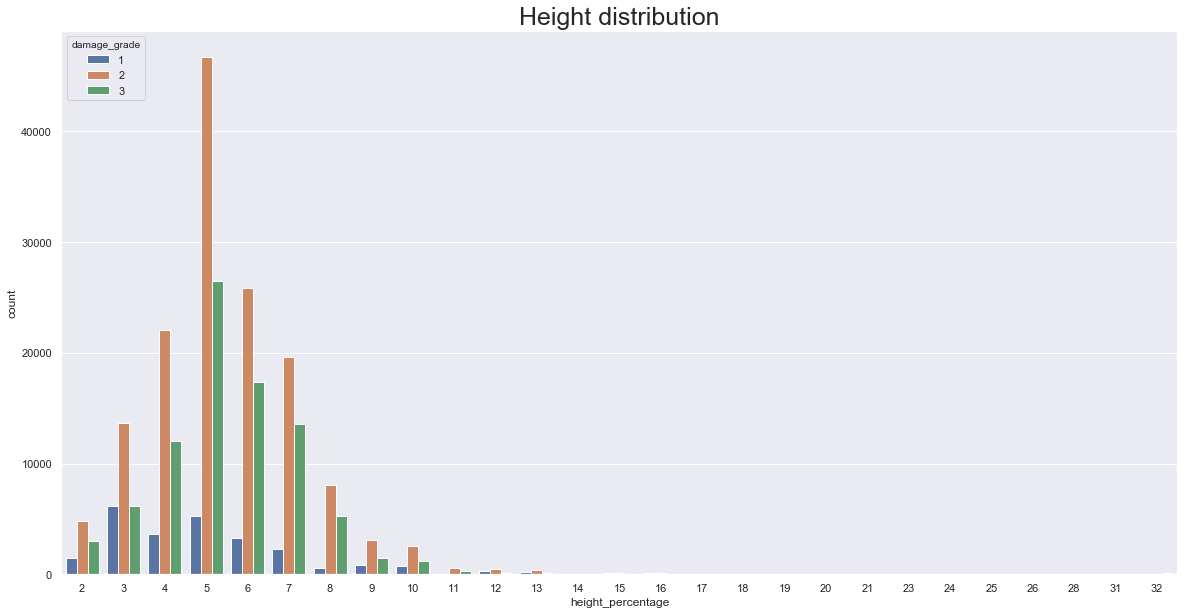

In [372]:
sns.set(style="darkgrid")
plt.figure(figsize=(20,10))
ax = sns.countplot(x = raw_train_features.height_percentage, hue = raw_train_labels.damage_grade)
plt.title('Height distribution', fontsize=25)
plt.show()


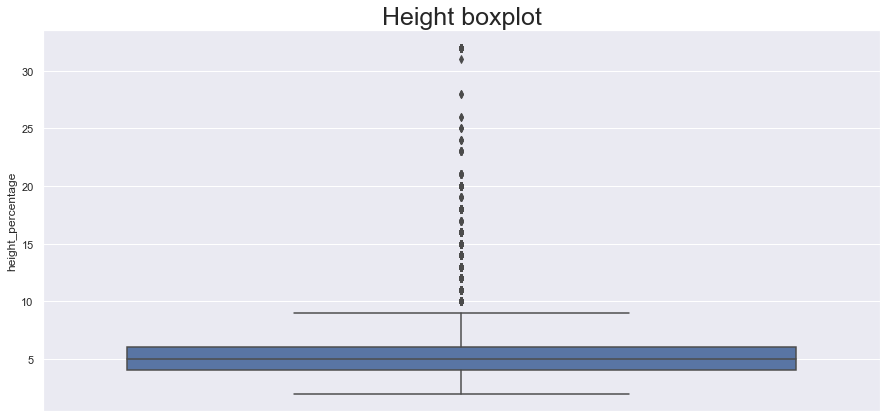

In [373]:
sns.set(style="darkgrid")
plt.figure(figsize=(15,7))
ax = sns.boxplot(y=raw_train_features.height_percentage)
plt.title('Height boxplot', fontsize=25)
plt.show()

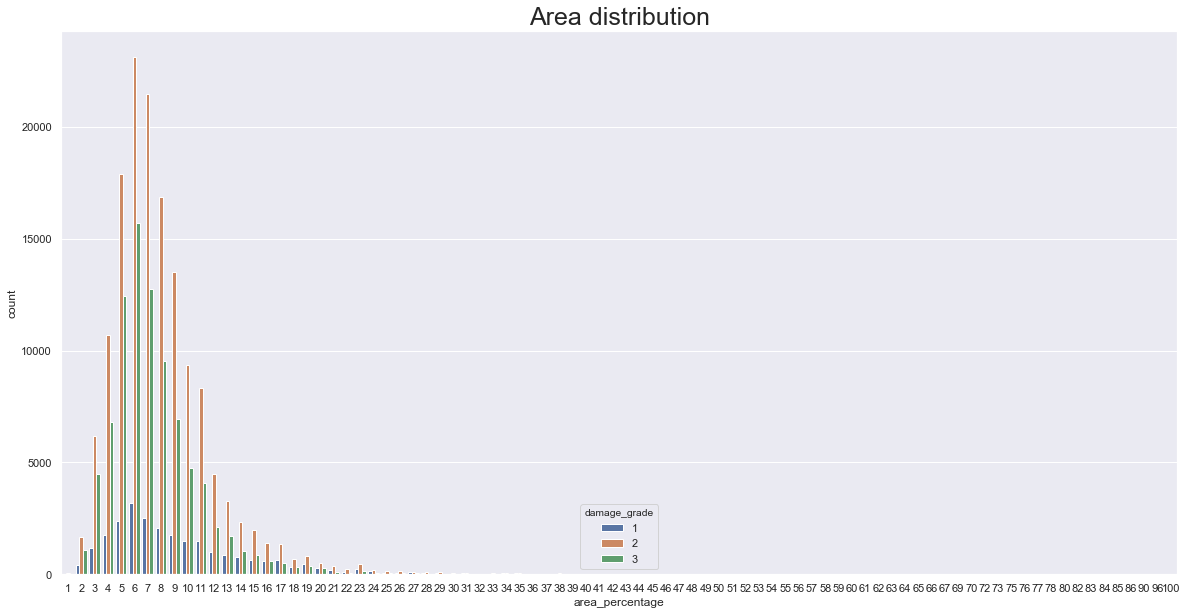

In [374]:
sns.set(style="darkgrid")
plt.figure(figsize=(20,10))
ax = sns.countplot(x = raw_train_features.area_percentage, hue = raw_train_labels.damage_grade)
plt.title('Area distribution', fontsize=25)
plt.show()

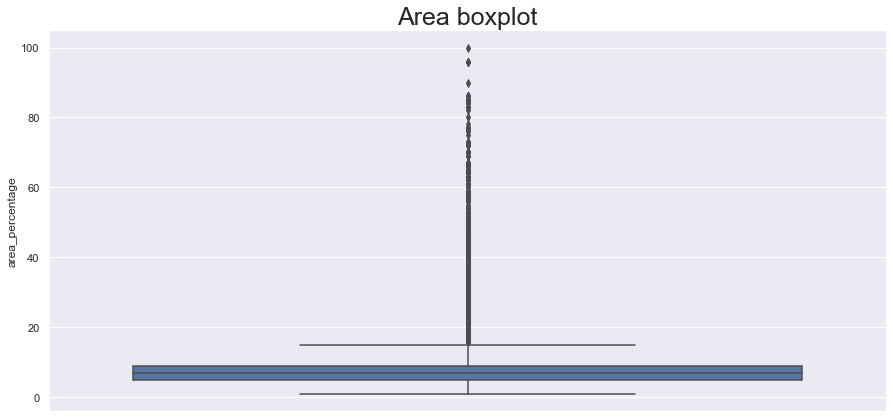

In [375]:
sns.set(style="darkgrid")
plt.figure(figsize=(15,7))
ax = sns.boxplot(y=raw_train_features.area_percentage)
plt.title('Area boxplot', fontsize=25)
plt.show()

#### Distribution of train labels

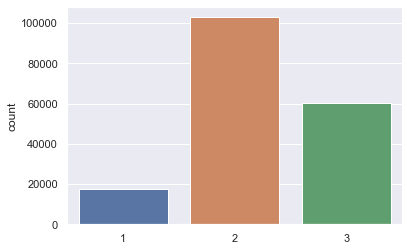

In [389]:
sns.set(style="darkgrid")
ax = sns.countplot(train_labels)

# Feature engineering

### Dealing with categorical variables

In [62]:
# One hot encoding of categorical variables

def hot_encode(df, lst):
    for i in lst:
        variable_df = pd.get_dummies(df[i], prefix = i)
        df = pd.concat([df, variable_df], axis=1)
        df = df.drop([i], axis=1)
    
    return df

categorical_features = ['foundation_type', 'land_surface_condition', 'roof_type', 'ground_floor_type', 'other_floor_type', 'position', 'plan_configuration', 'legal_ownership_status']
extended_train_features = hot_encode(raw_train_features, categorical_features)


### Age

In [63]:
# Drop buildings with more that 100 years from train features and labels

building_index = extended_train_features[extended_train_features.age > 100].index
extended_train_labels = raw_train_labels.copy()
extended_train_labels.drop(building_index, inplace=True)
extended_train_features.drop(building_index, inplace=True)
print(len(extended_train_labels))
print(len(extended_train_features))

258477
258477


In [64]:
# Normalizing age data

from sklearn.preprocessing import MinMaxScaler

scaler1 = MinMaxScaler()
train_age_scaled = scaler1.fit_transform(np.array(extended_train_features.iloc[:, 5]).reshape(-1,1))

print(train_age_scaled.mean(axis=0))
print(train_age_scaled.std(axis=0))

extended_train_features.age = train_age_scaled


[0.2101245]
[0.18558647]


/usr/local/lib/python3.6/site-packages/sklearn/utils/validation.py:475: DataConversionWarning: Data with input dtype int64 was converted to float64 by MinMaxScaler.
  warnings.warn(msg, DataConversionWarning)


### Height

In [65]:
# Normalize heigth data

scaler2 = MinMaxScaler()
train_hieght_scaled = scaler2.fit_transform(np.array(extended_train_features.iloc[:, 7]).reshape(-1,1))

extended_train_features.height_percentage = train_hieght_scaled


/usr/local/lib/python3.6/site-packages/sklearn/utils/validation.py:475: DataConversionWarning: Data with input dtype int64 was converted to float64 by MinMaxScaler.
  warnings.warn(msg, DataConversionWarning)


### Area

In [66]:
# Normalize area data

scaler3 = MinMaxScaler()
train_area_scaled = scaler3.fit_transform(np.array(extended_train_features.iloc[:, 6]).reshape(-1,1))

extended_train_features.area_percentage = train_hieght_scaled


/usr/local/lib/python3.6/site-packages/sklearn/utils/validation.py:475: DataConversionWarning: Data with input dtype int64 was converted to float64 by MinMaxScaler.
  warnings.warn(msg, DataConversionWarning)


### Geographic locations

In [92]:
scaler4 = MinMaxScaler()
train_geo1_scaled = scaler4.fit_transform(np.array(extended_train_features.iloc[:, 1]).reshape(-1,1))
extended_train_features.geo_level_1_id = train_geo1_scaled

scaler5 = MinMaxScaler()
train_geo2_scaled = scaler5.fit_transform(np.array(extended_train_features.iloc[:, 2]).reshape(-1,1))
extended_train_features.geo_level_2_id = train_geo2_scaled

scaler6 = MinMaxScaler()
train_geo3_scaled = scaler6.fit_transform(np.array(extended_train_features.iloc[:, 3]).reshape(-1,1))
extended_train_features.geo_level_3_id = train_geo3_scaled

extended_train_features

/usr/local/lib/python3.6/site-packages/sklearn/utils/validation.py:475: DataConversionWarning: Data with input dtype int64 was converted to float64 by MinMaxScaler.
  warnings.warn(msg, DataConversionWarning)


,building_id,geo_level_1_id,geo_level_2_id,geo_level_3_id,count_floors_pre_eq,age,area_percentage,height_percentage,has_superstructure_adobe_mud,has_superstructure_mud_mortar_stone,...,plan_configuration_m,plan_configuration_n,plan_configuration_o,plan_configuration_q,plan_configuration_s,plan_configuration_u,legal_ownership_status_a,legal_ownership_status_r,legal_ownership_status_v,legal_ownership_status_w
0,802906,0.200000,0.341275,0.970637,2,0.30,0.100000,0.100000,1,1,...,0,0,0,0,0,0,0,0,1,0
1,28830,0.266667,0.630694,0.223761,2,0.10,0.166667,0.166667,0,1,...,0,0,0,0,0,0,0,0,1,0
2,94947,0.700000,0.254380,0.714013,2,0.10,0.100000,0.100000,0,1,...,0,0,0,0,0,0,0,0,1,0
3,590882,0.733333,0.292922,0.850959,2,0.10,0.100000,0.100000,0,1,...,0,0,0,0,0,0,0,0,1,0
4,201944,0.366667,0.091801,0.118405,3,0.30,0.233333,0.233333,1,0,...,0,0,0,0,0,0,0,0,1,0
5,333020,0.266667,0.391030,0.484523,2,0.10,0.100000,0.100000,0,1,...,0,0,0,0,0,0,0,0,1,0
6,728451,0.300000,0.332866,0.960134,2,0.25,0.066667,0.066667,0,1,...,0,0,0,0,0,0,0,0,1,0
7,475515,0.666667,0.226349,0.973661,2,0.00,0.133333,0.133333,0,0,...,0,0,0,0,0,1,0,0,1,0
8,441126,0.000000,0.530484,0.574441,2,0.15,0.133333,0.133333,0,1,...,0,0,0,0,0,0,0,0,1,0
9,989500,0.866667,0.620883,0.079096,1,0.00,0.066667,0.066667,0,0,...,0,0,0,0,0,0,0,0,1,0


# Preparing the data for the ML models 

### Features and labels

In [93]:
labels = extended_train_labels['damage_grade']
labels = np.array(labels)
print(labels.shape)

# Remove building id
exclude = ['building_id']
 
features_pandas = extended_train_features.loc[:,[i for i in list(extended_train_features.columns) if i not in exclude]]
features = np.array(features_pandas)
print(features_pandas.shape)

(258477,)
(258477, 68)


### Split data

In [94]:
train_features, test_features, train_labels, test_labels = train_test_split(features, labels, test_size = 0.3, random_state = 5, shuffle=True)
print('Shape of data')
print(train_features.shape)
print(train_labels.shape)
print(test_features.shape)
print(test_labels.shape)
print("")


Shape of data
(180933, 68)
(180933,)
(77544, 68)
(77544,)



# Models

In [70]:
from sklearn.svm import SVC
from sklearn.metrics import confusion_matrix, accuracy_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import f1_score

#### Helpers

In [69]:
def confusionMatrix(y_test, y_pred):
    cm = confusion_matrix(y_test, y_pred)
    data_cm = pd.DataFrame(cm, columns=np.unique(y_test), index = np.unique(y_test))
    data_cm.index.name = 'Actual'
    data_cm.columns.name = 'Predicted'

    sns.set(font_scale=1.4)
    fig, ax = plt.subplots(figsize=(12,6))
    
    ax.set(yticks=[-0.5, 1.5], 
       xticks=[0, 1], 
       yticklabels=data_cm.index, 
       xticklabels=data_cm.columns)

    sns.heatmap(data_cm, cmap="Blues", annot=True, fmt='', ax=ax)
    return data_cm

### XGBoost & identifying feature importance

In [11]:
# Import necessary modules
from xgboost import XGBClassifier
from sklearn.model_selection import RandomizedSearchCV
from sklearn import metrics

In [12]:
# Instatiate XGB classifier
xgb = XGBClassifier(objective='multi:softmax', n_classes=3)

In [7]:
# Define hyper parameters for Randomized Search
params = {
    'learning_rate': (np.geomspace(1e-2, 1)),
    'max_depth': (range(1, 10)),
    'gamma': (np.geomspace(1e-2, 1)),
    'min_child_weight': (range(1, 10)),
    'n_estimators': (range(30, 300)),
    'reg_alpha': (np.linspace(0.2, 1)),
    'reg_lambda': (np.linspace(0.2, 2)),
    'subsample': (np.linspace(0.6,1.0)),
    'colsample_bytree': (np.linspace(0.6, 1.0))
}

In [8]:
# Define the metric to evaluate the model
kappa_scorer = metrics.make_scorer(metrics.cohen_kappa_score, weights='quadratic')

In [20]:
# Perform randomized search to obtain best parameters (I did it once, took 2 hours. Obtained parameters below.)
clf = RandomizedSearchCV(xgb, params, scoring=kappa_scorer, random_state=1, n_iter=25, cv=5, verbose=0, n_jobs=-1)
clf_fit = clf.fit(train_features, train_labels)
print('\n Best estimator:')
print(clf.best_estimator_)
print('\n Best score:')
print(clf.best_score_)
print('\n Best hyperparameters:')
print(clf.best_params_)


 Best estimator:
XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bytree=0.9428571428571428, gamma=0.3906939937054615,
       learning_rate=0.32374575428176433, max_delta_step=0, max_depth=8,
       min_child_weight=8, missing=None, n_classes=3, n_estimators=265,
       n_jobs=1, nthread=None, objective='multi:softprob', random_state=0,
       reg_alpha=0.6081632653061224, reg_lambda=1.5591836734693878,
       scale_pos_weight=1, seed=None, silent=True,
       subsample=0.8122448979591836)

 Best score:
0.608807959082588

 Best hyperparameters:
{'subsample': 0.8122448979591836, 'reg_lambda': 1.5591836734693878, 'reg_alpha': 0.6081632653061224, 'n_estimators': 265, 'min_child_weight': 8, 'max_depth': 8, 'learning_rate': 0.32374575428176433, 'gamma': 0.3906939937054615, 'colsample_bytree': 0.9428571428571428}


In [107]:
# Select best hyper parameters
best_params = {'subsample': 0.8122448979591836, 'reg_lambda': 1.5591836734693878, 
               'reg_alpha': 0.6081632653061224, 'n_estimators': 265, 
               'min_child_weight': 8, 'max_depth': 8, 
               'learning_rate': 0.32374575428176433, 
               'gamma': 0.3906939937054615, 'colsample_bytree': 0.9428571428571428}

In [108]:
# Instantiate and fit the model using best parameters
xgb_bst = XGBClassifier(objective='multi:softmax', n_classes=3, **best_params)
bst_fit = xgb_bst.fit(train_features, train_labels)


In [125]:
# Generate predictions
bst_preds = bst_fit.predict(test_features)


0.7419787475497782

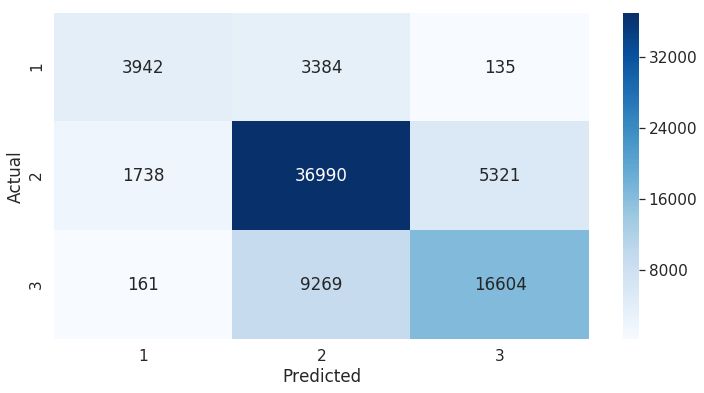

In [124]:
xbb_cm = confusionMatrix(test_labels, bst_preds)
f1_score(test_labels, bst_preds, average = 'micro')


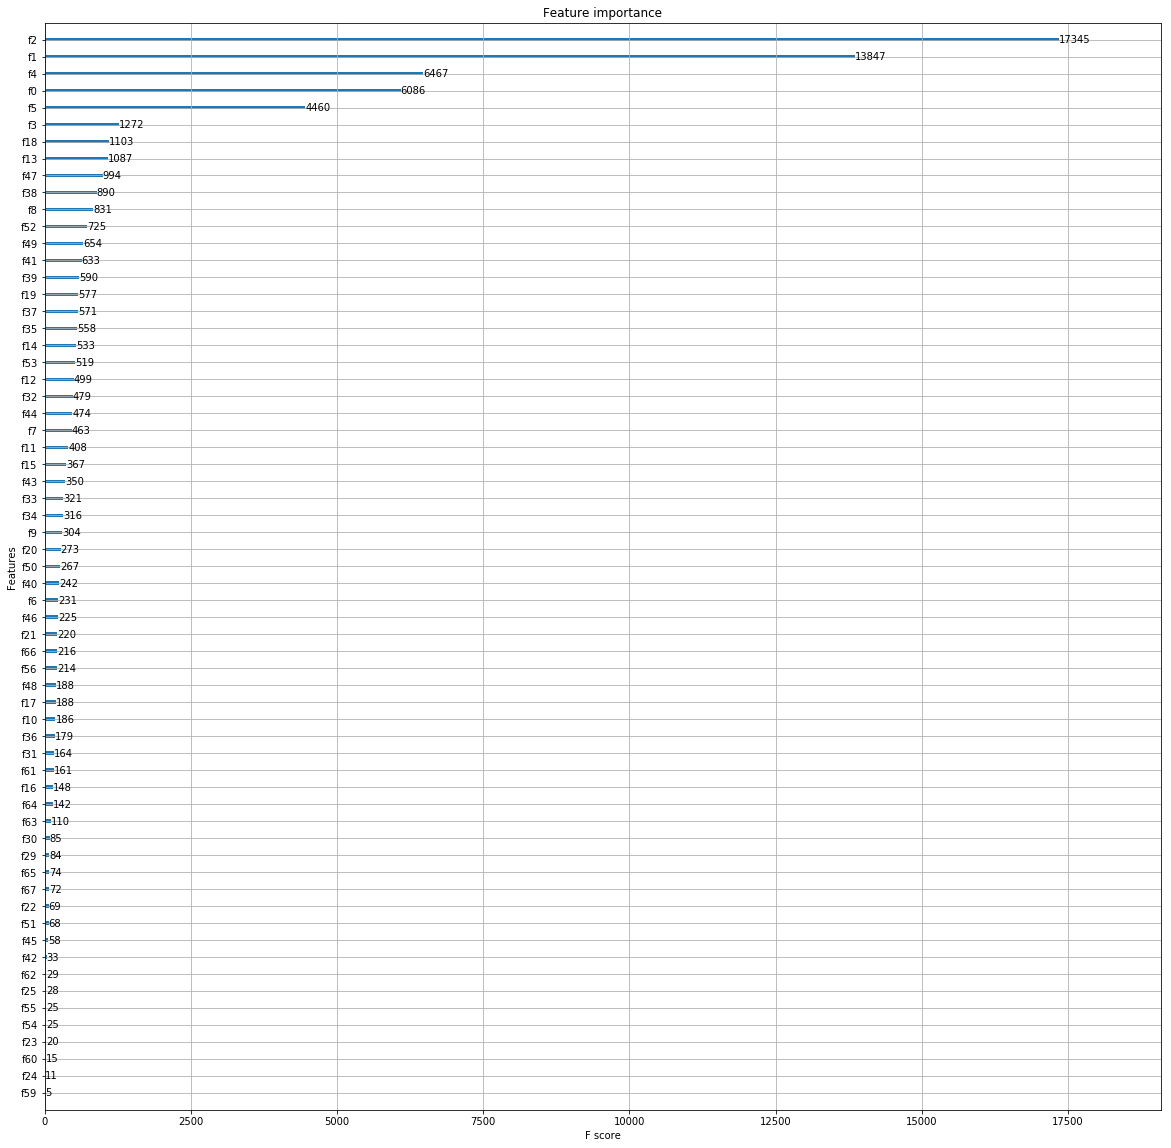

In [20]:
# Plot feature importance

from xgboost import plot_importance
plt.rcParams["figure.figsize"] = (20, 20)
plot_importance(xgb_bst)
plt.show()

#### Eliminate less important training features

In [95]:
train_features_upd = train_features[:,[2 , 1, 4, 0, 5, 3, 18, 13, 47, 38, 8, 52, 40, 41, 39, 19, 37, 35, 14, 53]]
test_features_upd = test_features[:,[2 , 1, 4, 0, 5, 3, 18, 13, 47, 38, 8, 52, 40, 41, 39, 19, 37, 35, 14, 53]]
print(train_features_upd.shape)
print(train_labels.shape)
print(test_features_upd.shape)



(180933, 20)
(180933,)
(77544, 20)


### Logistic Regression

In [98]:
logistic_model = LogisticRegression(random_state = 5, multi_class = 'ovr', verbose = 1).fit(train_features_upd, train_labels)

[LibLinear]

In [99]:
logistic_prediction = logistic_model.predict(test_features_upd)

With 69 features: 0.5746414938615496
With 20 features:  0.5768080057773651


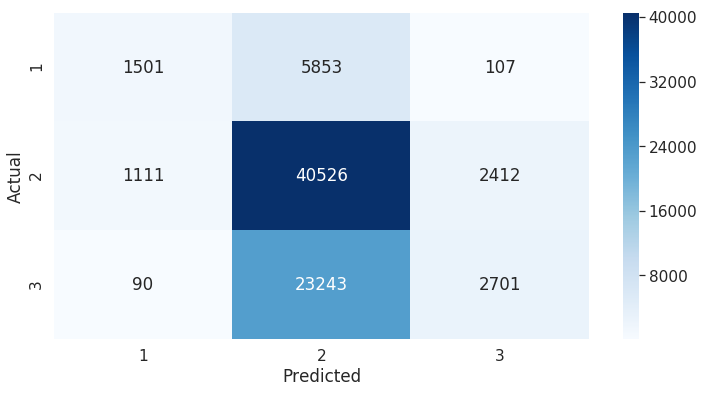

In [100]:
random_cm = confusionMatrix(test_labels, logistic_prediction)
print('With 69 features: 0.5746414938615496')
print('With 20 features: ', f1_score(test_labels, logistic_prediction, average = 'micro'))

### Random Forest

In [101]:
random_forest1 = RandomForestClassifier(n_estimators = 100)
random_forest1.fit(train_features_upd, train_labels)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [77]:
random_prediction1 = random_forest1.predict(test_features_upd)

With 69 features: 0.7027880945011864
With 20 features: 0.7009826679046735
With 20 features & normalized geographic location:  0.7009826679046735


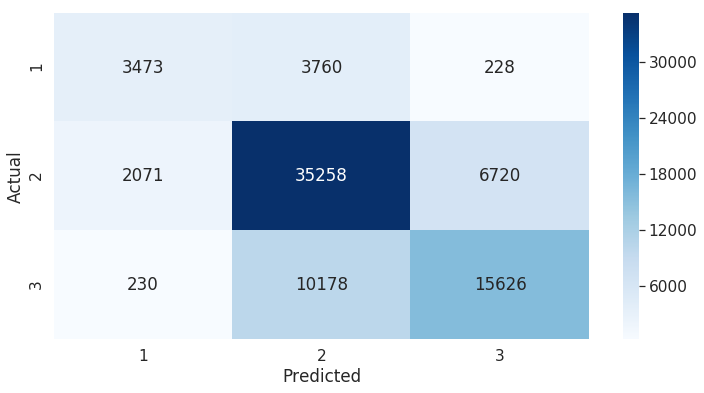

In [102]:
random_cm1 = confusionMatrix(test_labels, random_prediction1)
print('With 69 features: 0.7027880945011864')
print ('With 20 features: 0.7009826679046735') 
print('With 20 features & normalized geographic location: ', f1_score(test_labels, random_prediction1, average = 'micro'))

### Neuronal Networks

In [82]:
from keras.models import Sequential
from keras.layers import Dense
from keras.callbacks import ModelCheckpoint
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder
from keras.utils import to_categorical



Using TensorFlow backend.


In [83]:
# One hot encode train and test labels

label_encoder = LabelEncoder()
enc_train_labels = label_encoder.fit_transform(train_labels)
onehot_train_labels = to_categorical(enc_train_labels, num_classes=3)

label_encoder = LabelEncoder()
enc_test_labels = label_encoder.fit_transform(test_labels)
onehot_test_labels = to_categorical(enc_test_labels, num_classes=3)




In [90]:
### Define the model

NB_EPOCHS = 1000
BATCH_SIZE = 16

nn_model = Sequential()

# Input layer
nn_model.add(Dense(512, input_shape = (20,)))

# Hidden layer
nn_model.add(Dense(218))

# Hidden layer
nn_model.add(Dense(64))

# Output layer
nn_model.add(Dense(3, activation = 'softmax'))

nn_model.compile(loss='categorical_crossentropy', optimizer='rmsprop', metrics=['accuracy'])

ckpt_model = 'pima-weights.best.hdf5'
checkpoint = ModelCheckpoint(ckpt_model, 
                            monitor='val_acc',
                            verbose=1,
                            save_best_only=True,
                            mode='max')
callbacks_list = [checkpoint]

nn_model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_9 (Dense)              (None, 512)               10752     
_________________________________________________________________
dense_10 (Dense)             (None, 218)               111834    
_________________________________________________________________
dense_11 (Dense)             (None, 64)                14016     
_________________________________________________________________
dense_12 (Dense)             (None, 3)                 195       
Total params: 136,797
Trainable params: 136,797
Non-trainable params: 0
_________________________________________________________________


In [96]:
# Train the model

history = nn_model.fit(train_features_upd,
                       onehot_train_labels,
                       validation_data = (test_features_upd, onehot_test_labels),
                       nb_epoch = NB_EPOCHS,
                       batch_size = BATCH_SIZE,
                       callbacks = callbacks_list,
                       verbose = 0)

/usr/local/lib/python3.6/site-packages/ipykernel_launcher.py:9: UserWarning: The `nb_epoch` argument in `fit` has been renamed `epochs`.
  if __name__ == '__main__':



Epoch 00001: val_acc improved from 0.56805 to 0.56966, saving model to pima-weights.best.hdf5

Epoch 00002: val_acc improved from 0.56966 to 0.57877, saving model to pima-weights.best.hdf5

Epoch 00003: val_acc did not improve from 0.57877

Epoch 00004: val_acc did not improve from 0.57877

Epoch 00005: val_acc did not improve from 0.57877

Epoch 00006: val_acc did not improve from 0.57877

Epoch 00007: val_acc did not improve from 0.57877

Epoch 00008: val_acc did not improve from 0.57877

Epoch 00009: val_acc did not improve from 0.57877

Epoch 00010: val_acc did not improve from 0.57877

Epoch 00011: val_acc did not improve from 0.57877

Epoch 00012: val_acc did not improve from 0.57877

Epoch 00013: val_acc did not improve from 0.57877

Epoch 00014: val_acc did not improve from 0.57877

Epoch 00015: val_acc did not improve from 0.57877

Epoch 00016: val_acc did not improve from 0.57877


KeyboardInterrupt: 

In [97]:
print('With 69 features: 0.56805')
print('With 20 features: 0.56805')
print('With 20 features and normalized geographic locations: 0.57877')

With 69 features: 0.56805
With 20 features: 0.56805
With 20 features and normalized geographic locations: 0.57877


In [115]:
# prediction with neural network
neural_prediction = nn_model.predict_classes(test_features_upd, verbose=0)

0.14209996904982977

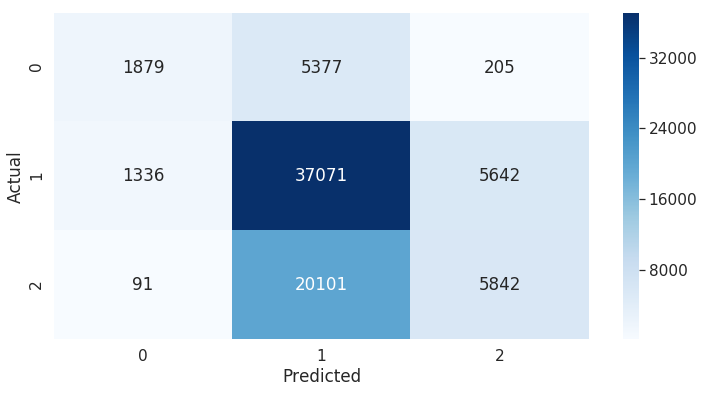

In [121]:
nn_cm = confusionMatrix(enc_test_labels, neural_prediction)
f1_score(test_labels, neural_prediction, average = 'micro')



# Summary

In [123]:
from prettytable import PrettyTable
x = PrettyTable()
x.field_names = ['Model', 'Type', 'Micro average f1 score']
x.add_row(['1', 'xgboost', '0.74'])
x.add_row(['2', 'logistic regression', '0.57'])
x.add_row(['3', 'random forest', '0.70'])
x.add_row(['4', 'neuronal network', '0.14'])
print(x)

+-------+---------------------+------------------------+
| Model |         Type        | Micro average f1 score |
+-------+---------------------+------------------------+
|   1   |       xgboost       |          0.74          |
|   2   | logistic regression |          0.57          |
|   3   |    random forest    |          0.70          |
|   4   |   neuronal network  |          0.14          |
+-------+---------------------+------------------------+
